# Fourier Transform 

Depending on your prior math/physics experiences, you may have heard of the Fourier Transform, but never used it or seen it in practice. This is not surprising as it is often left as an upper-level topic, but there are so many applications in engineering and physics, it would be a disservice to not cover the topic in Computational Physics. 

Our goal here will be to understand the basic idea behind the Fourier Transform and how we can compute it using numerical techniques (typically called the Discrete Fourier Transform), and finally introduce the Fast Fourier Transform. 

## The Set-up 

We will start by investigating a hypothetical signal, a sin function that describes how some quantity `y` varies with time:

$$y_{(t)} = A sin(2\pi ft + \phi )$$

Let's make it so our signal is the composit of 5 signals stacked together:

$$y_{(t)} = \sum A_j sin(2\pi f_jt + \phi_j)$$

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

# using random inputs for A, f, and phi
A = [2.0, 2.5, 0.5, 1.0, 1.5]
c = 2*math.pi
f = [1/10, 3/10, 5/10, 7/10, 9/10]
phi = [0, math.pi/2, 0, math.pi/2, 0]

# time over which we are interested in
sr = 100 # sample rate
ts = 1/sr #time step
t = np.arange(0,10,ts) 

y1 = np.zeros(len(t))
y2 = np.zeros(len(t))
y3 = np.zeros(len(t))
y4 = np.zeros(len(t))
y5 = np.zeros(len(t))


for i in range(len(t)):
    y1[i] = A[0] * math.sin(c*f[0]*t[i] + phi[0])
    y2[i] = A[1] * math.sin(c*f[1]*t[i] + phi[1])
    y3[i] = A[2] * math.sin(c*f[2]*t[i] + phi[2])
    y4[i] = A[3] * math.sin(c*f[3]*t[i] + phi[3])
    y5[i] = A[4] * math.sin(c*f[4]*t[i] + phi[4])

y_sum = y1 + y2 + y3 + y4 + y5

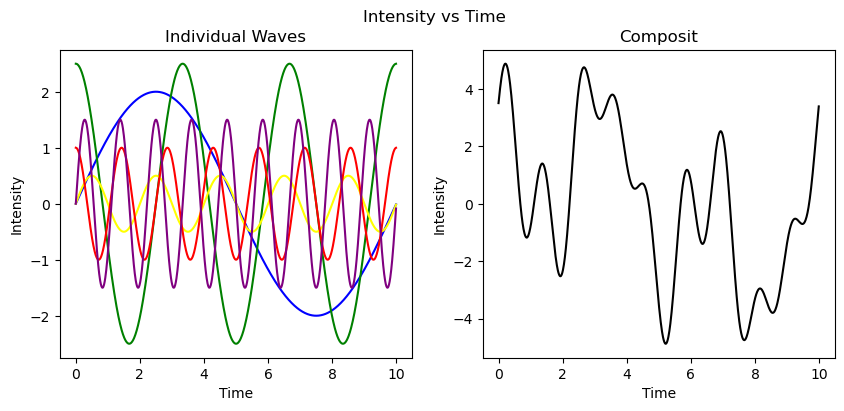

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Intensity vs Time')
axs[0].plot(t, y1, color = 'blue')
axs[0].plot(t, y2, color = 'green')
axs[0].plot(t, y3, color = 'yellow')
axs[0].plot(t, y4, color = 'red')
axs[0].plot(t, y5, color = 'purple')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Intensity')
axs[0].set_title("Individual Waves")
axs[1].plot(t, y_sum, color = 'black')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Intensity')
axs[1].set_title("Composit")
plt.show() 

So, basically any function $y_{(t)}$ can be written as a sum of sine waves. Most signals will be more complicated than our example above, but knowing that such a sum exists can be very useful. 

We can express our equation as an integral over frequency: 

$$Y_{(f)} = \int_{-\infty}^{\infty} y_{(t)}e^{-2\pi ift} \, dt $$

where $i = \sqrt{-1}$.

It is common to refer to $y_{(t)}$ as a function in the time domain and to its transform $Y_{(f)}$ as existing in the frequency domain. To move between these parallel descriptions, we can simply take the inverse Fourier Transform: 

$$y_{(t)} = \int_{-\infty}^{\infty} Y_{(f)}e^{2\pi ift} \, df $$

These are sometimes referred to as the *forward* and *reverse* transforms. 

Our problem is to implement this in a way the computer can actually calculate. This means we will want to use the Discrete Fourier Transform. 

## Discrete Fourier Transform 

If we happen to know the functional form of $y_{(t)}$, we could perform the integral equation above (assuming the analytical form is one that can be integrated). However, in numerical work we are almost never going to have the analytic form of the signal. Instead, we will likely only have knowledge of its amplitude at certain discrete time intervals. 

A major requirement our data points must conform to is that they are **evenly spaced**. Depending on what type of data you are working with, this may or may not automatically be the case. If not, it may be necessary to interpolate values between data points to fit the requirement. 

The equations for the Discrete Fourier Transform are then: 

$$ y_{(m)}= \frac{1}{N} \sum_{n=0}^{N-1} Y_{n}e^{2\pi imn/N}$$

$$ Y_{(n)} = \sum_{m=0}^{N-1} y_{m}e^{-2\pi imn/N}$$

Where the index $m$ on $y$ corresponds to the discrete times $t_m$ and the index $n$ on $Y$ corresponds to the discrete frequencies $f_n$. 

The forward and inverse Discrete Fourier Transforms are related via

$$ \sum_{n=0}^{N-1} e^{2\pi in(m-m')/N} = N\delta_{m,m'}$$

where $\delta_{m,m'}$ ($= 1$ if $m = m'$, $= 0$ otherwise) is the Kronecker delta function. The above equation means that if we perform a forward transform followed by an inverse transform, we will return to the original function. 

In [7]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N) # note: j denotes imaginary i in python
    
    X = np.dot(e, x)
    
    return X

/tmp/ipykernel_64/2737247885.py:10: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, abs(X), 'b', \


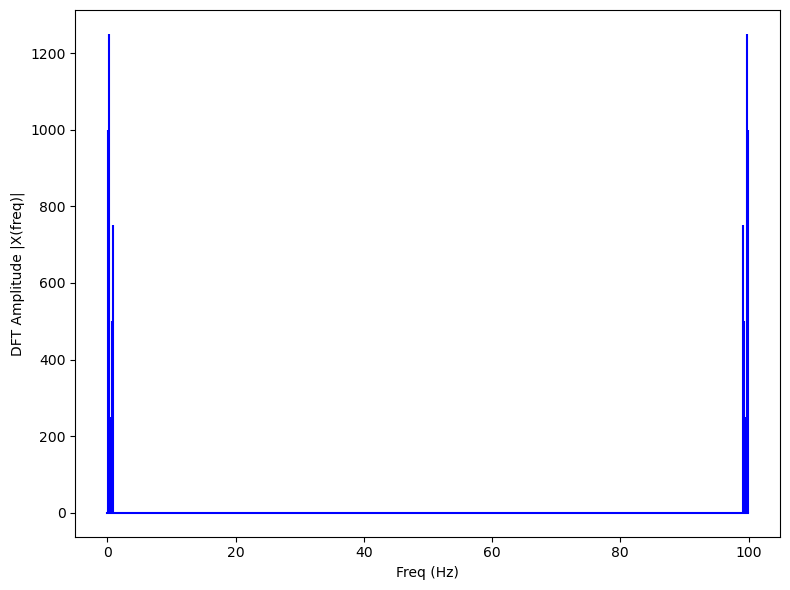

In [8]:
X = DFT(y_sum)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = (N)/sr
freq = n/T

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
#plt.xlim(0, 10)
plt.tight_layout()
plt.show()



We can see from here that the output of the DFT is symmetric at half of the sampling rate (you can try different sampling rate to test). This half of the sampling rate is called Nyquist frequency or the folding frequency, it is named after the electronic engineer Harry Nyquist. He and Claude Shannon have the Nyquist-Shannon sampling theorem, which states that a signal sampled at a rate can be fully reconstructed if it contains only frequency components below half that sampling frequency, thus the highest frequency output from the DFT is half the sampling rate.

/tmp/ipykernel_64/2600546681.py:10: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(f_oneside, abs(X_oneside), 'b', \
/tmp/ipykernel_64/2600546681.py:16: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(f_oneside, abs(X_oneside), 'b', \


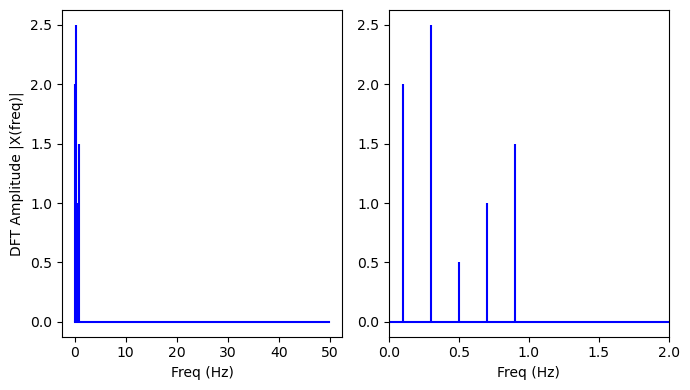

In [9]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (7, 4))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 2)
plt.tight_layout()
plt.show()

The above returns the expected amplitude and frequency of the individual waves that make up our composit signal. 

## Numpy Fast Fourier Transform

In practice, our DFT is computationally very expensive. Each term involves the computation of the exponential factor, which must be multiplied by $y_m$ and added to the running total. So the total number of operations is of order $N^2$. 

This is bad...

Even with a fast computer, this brute force approach will take prohibitively long to calculate values of interest. 

However, [smart people](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm) were able to make an algorithm that is capable of performing the computation in $N$log$N$ operations, which is substantial for even $N$ ~ 1000. 

We are not going to derive the algorith here, but it is worth reading up on the different FFT algorithms if you ever find yourself in a position where you might need to use it. 

In [10]:
g = np.fft.fft(y_sum)
# G = ((g.real)**2 + (g.imag)**2)
h = np.fft.fftfreq((len(y_sum)), 0.01)

/tmp/ipykernel_64/2615990402.py:9: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(h_oneside, abs(g_oneside).real, 'b', \


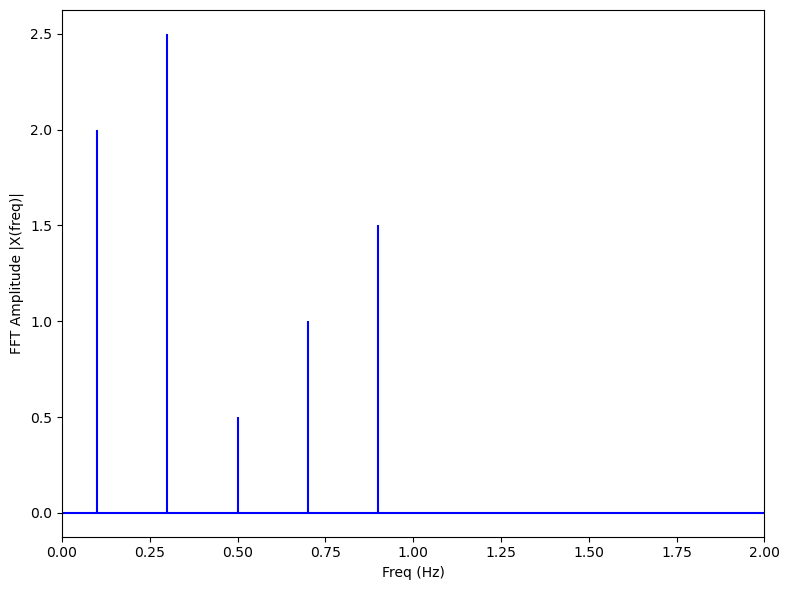

In [11]:
n_oneside = N//2
# get the one side frequency
h_oneside = h[:n_oneside]

# normalize the amplitude
g_oneside = g[:n_oneside]/n_oneside

plt.figure(figsize = (8, 6))
plt.stem(h_oneside, abs(g_oneside).real, 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 2)
plt.tight_layout()
plt.show()

## Inverse DFT

The inverse DFT should take our DFT values and return the original input. Write your own IDFT function that will return the composit function. 

In [25]:
def IDFT(X):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """


    N = len(X)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N) # note: j denotes imaginary i in python
    
    x = (1/N)*np.dot(e, X)
    
    return x

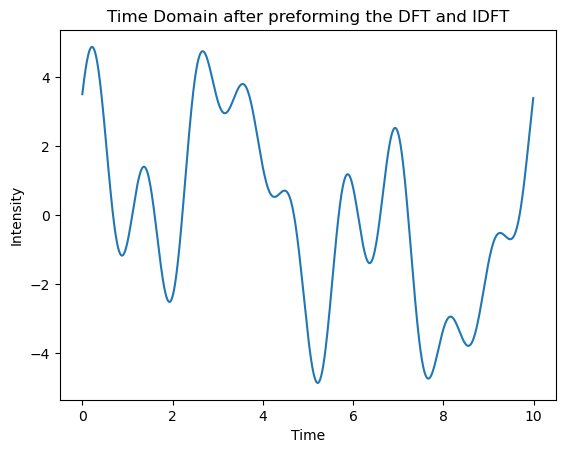

In [26]:
x_calc = IDFT(X)

plt.plot(t,x_calc)
plt.title("Time Domain after preforming the DFT and IDFT")
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.show()


<font color = 'blue'>
This looks just like the original signal confirming the Inverse Discrete Fourier Transform function I wrote works. 
</font>